In [2]:
import osh5def
import osh5vis
import osh5io
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import sys
import pickle
sys.path.append('../src')
sys.path.append('../src/vysxd')
sys.path.append('../FLASH_OSIRIS_interface')
from FLASH_OSIRIS_define import FLASH_OSIRIS

# # Set the default font size for axis labels
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 20
# Set the default font size for tick labels
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

yt : [INFO     ] 2025-06-25 18:00:37,505 Loading plugins from /home/dschneidinger/.config/yt/my_plugins.py


In [4]:
# data_dir = Path(f'../simulations/save_data/magshockz-v3.2.1d-7.14debye/MS')
data_dir = Path('../simulations/save_data/magshockz-v3.2.1d-45degrees.1d/MS')
interface = pickle.load(open(f'{data_dir.parent}/instance.pkl', 'rb'))
# data_dir = Path('../simulations/restart/magshockz-v3.1.1d-200-100-100ppc/MS')

def look_through_data(data_dir:Path, diagnostics:dict):
    for item in data_dir.rglob(''):
        item = item.relative_to(data_dir)
        dirs = item.as_posix().split('/')
        if len(dirs) > 1:
            diagnostics[item.as_posix()] = item.as_posix()

diagnostics = {}
look_through_data(data_dir, diagnostics)
fields = {
    'p1x1/electrons' : f'{data_dir / diagnostics["PHA/p1x1/electrons"]}/p1x1-electrons',
    'p1x1/si': f'{data_dir / diagnostics["PHA/p1x1/si"]}/p1x1-si',
    'p1x1/channel': f'{data_dir / diagnostics["PHA/p1x1/channel"]}/p1x1-channel',
    'p1x1/sheathe': f'{data_dir / diagnostics["PHA/p1x1/sheathe"]}/p1x1-sheathe',
    'p1x1/background': f'{data_dir / diagnostics["PHA/p1x1/background"]}/p1x1-background',
    # 'p1x1/Aluminum' : f'{data_dir / diagnostics["PHA/p1x1/Aluminum"]}/p1x1-Aluminum',
    # 'p2x1/electron' : f'{data_dir / diagnostics["PHA/p2x1/electron"]}/p2x1-electron',
    # 'p2x1/si' : f'{data_dir / diagnostics["PHA/p2x1/Silicon"]}/p2x1-si',
    'FLD/b1-savg' : f'{data_dir / diagnostics["FLD/b1-savg"]}/b1-savg',
    'FLD/b2-savg' : f'{data_dir / diagnostics["FLD/b2-savg"]}/b2-savg',
    'FLD/b3-savg' : f'{data_dir / diagnostics["FLD/b3-savg"]}/b3-savg',
    'FLD/e1-savg' : f'{data_dir / diagnostics["FLD/e1-savg"]}/e1-savg',
    'FLD/e2-savg' : f'{data_dir / diagnostics["FLD/e2-savg"]}/e2-savg',
    'FLD/e3-savg' : f'{data_dir / diagnostics["FLD/e3-savg"]}/e3-savg',
    'DENSITY/channel': f'{data_dir / diagnostics["DENSITY/channel/charge"]}/charge-channel',
    'DENSITY/background': f'{data_dir / diagnostics["DENSITY/background/charge"]}/charge-background',
    'DENSITY/sheathe': f'{data_dir / diagnostics["DENSITY/sheathe/charge"]}/charge-sheathe',
    'DENSITY/si': f'{data_dir / diagnostics["DENSITY/si/charge"]}/charge-si',
    # 'UDIST/si/ufl1': f'{data_dir / diagnostics["UDIST/si/ufl1"]}/ufl1-si',
    # 'UDIST/background/ufl1': f'{data_dir / diagnostics["UDIST/background/ufl1"]}/ufl1-background',
    # 'UDIST/background/uth1': f'{data_dir / diagnostics["UDIST/background/uth1"]}/uth1-background',
    # 'UDIST/background/uth2': f'{data_dir / diagnostics["UDIST/background/uth2"]}/uth2-background',
}

vlimits = {
    'p1x1/electron' : (0, 0.1),
    # 'p1x1/Silicon' : (0, 400),
    # 'p1x1/Aluminum' : (0.1, 300),
    'p1x1/Silicon' : (0.1, 300),
    'p1x1/channel' : (0.1, 8),
    'p2x1/electron' : (0, 0.1),
    'p2x1/Aluminum' : (0, 0.1),
    'p1x1/background' : (0, 0.1),
    'FLD/b1-savg' : (-0.2, 0.2),
    'FLD/b2-savg' : (-0.2, 0.2),
    'FLD/b3-savg' : (-0.2, 0.2),
    'FLD/e1-savg' : (-0.8, 0.8),
    'FLD/e2-savg' : (-0.08, 0.08),
    'FLD/e3-savg' : (-0.04, 0.04),
    'DENSITY/channel': (0, 10),
    'DENSITY/si': (0,10),
    'DENSITY/background': (0,10),
    'UDIST/Silicon/ufl1': (-.07, 0.04),
    'UDIST/Aluminum/ufl1': (-.07, 0.04),
}

In [8]:
import make_movie_mp

make_movie_mp.phase_space_movie(path_to_data = [fields['p1x1/si'],fields['p1x1/channel'],fields['p1x1/sheathe'],fields['p1x1/background']],
      vlimits = vlimits['p1x1/channel'],
      gyrotime = interface.gyrotime,n_jobs=1, dpi = 100)

# make_movie_mp.movie(path_to_data = fields['FLD/b2-savg'],gyrotime=interface.gyrotime,vlimits=vlimits['FLD/b2-savg'],)

# make_movie_mp.movie(path_to_data = fields['DENSITY/sheathe'],gyrotime=interface.gyrotime)

/home/dschneidinger/MagShockZ/analysis_notebooks/../src/make_movie_mp.py:105: RuntimeWarning: divide by zero encountered in log
  osh5vis.osplot(np.log(data_0), vmax=vlimits[1], vmin=vlimits[0], cmap=cmaps[i],colorbar=colorbar)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

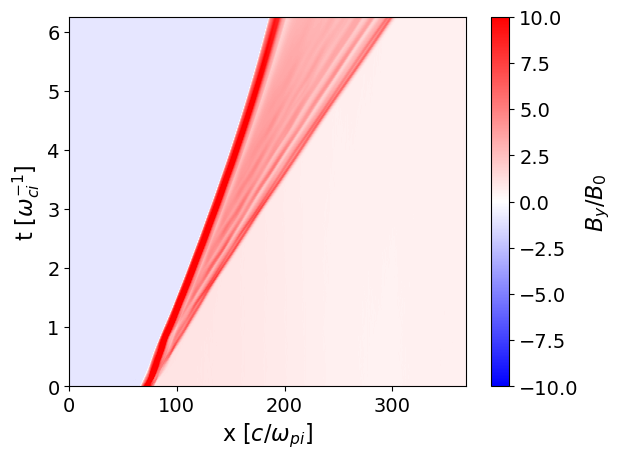

In [ ]:
from make_stack_plots import make_joy_plot
from scipy.signal import savgol_filter
sys.path.append('../src/vysxd')
import vysxd_analysis
import vysxd_define
b0_osiris = -1*75000/interface.normalizations['Bx_int']
# b0_osiris = 1
# Ensure the path to ion charge density files is correct
path_to_data = Path(fields['FLD/b2-savg']).parent

data = vysxd_analysis.get_osiris_quantity_1d(path_to_data.as_posix()+'/')
plt.imshow(data[0]/b0_osiris,aspect='auto',cmap='bwr',origin='lower',
           extent=(data[4][0]/np.sqrt(interface.species_rqms['channel']/interface.rqm_factor),
           data[4][-1]/np.sqrt(interface.species_rqms['channel']/interface.rqm_factor),
           data[3][0]/(interface.gyrotime),data[3][-1]/(interface.gyrotime)),vmax = 10,vmin = -10)
plt.ylabel(r't $[\omega_{ci}^{-1}]$')
plt.xlabel(r'x $[c/\omega_{pi}]$')
plt.colorbar(label=r"$B_y/B_0$")
# Ensure the path to ion charge density files is correct
# path_to_data = Path(fields['DENSITY/ions']).parent
# make_joy_plot(path_to_data,n_skip=10, time_labels=True,alpha=0.1,y_spacing=0.4,cmap='plasma',dpi=100)

In [ ]:
path_to_data = Path(fields['UDIST/background/uth1']).parent

data = vysxd_analysis.get_osiris_quantity_1d(path_to_data.as_posix()+'/')
plt.imshow(data[0],aspect='auto',cmap='bwr',origin='lower',
           extent=(data[4][0]/np.sqrt(interface.species_rqms['channel']/interface.rqm_factor),
           data[4][-1]/np.sqrt(interface.species_rqms['channel']/interface.rqm_factor),
           data[3][0]/(interface.gyrotime),data[3][-1]/(interface.gyrotime)))
plt.ylabel(r't $[\omega_{ci}^{-1}]$')
plt.xlabel(r'x $[c/\omega_{pi}]$')
plt.colorbar(label=r"$B_y/B_0$")

KeyError: 'UDIST/background/uth1'

In [ ]:
data_0 = osh5io.read_h5(f'{data_dir / diagnostics["DENSITY/electrons/charge"]}/charge-electrons-000000.h5')

data_0.run_attrs

{'simdir': '../simulations/save_data/magshockz-v3.2.1d-7.14debye',
 'dirname': '../simulations/save_data/magshockz-v3.2.1d-7.14debye/MS/DENSITY/electrons/charge',
 'extension': '.h5',
 'ITER': array([0], dtype=int32),
 'NAME': 'charge',
 'OFFSET_T': array([0.]),
 'OFFSET_X': array([0.5]),
 'TIME': array([0.]),
 'TIME UNITS': osh5def.OSUnits at 0x7719f1ceea80: ('m_e', 'c', '\\omega', 'e', 'n_0')=(0, 0, -1, 0, 0),
 'TYPE': 'grid',
 'SIMULATION': {'COMPILE_TIME': array([b'May 19 2025 17:24:00'], dtype='|S1024'),
  'DT': array([0.045921]),
  'GIT_VERSION': array([b'4.4.4-293-g983d5d2'], dtype='|S1024'),
  'INPUT_FILE': array([b'input_file.txt'], dtype='|S1024'),
  'INPUT_FILE_CRC32': array([2.02454229e+08]),
  'MOVE C': array([0], dtype=int32),
  'NDIMS': array([1], dtype=int32),
  'NX': array([153653], dtype=int32),
  'PAR_NODE_CONF': array([2], dtype=int32),
  'PAR_NX_X1': array([76853, 76800], dtype=int32),
  'PERIODIC': array([0], dtype=int32),
  'TIMESTAMP': array([b''], dtype='|S1024

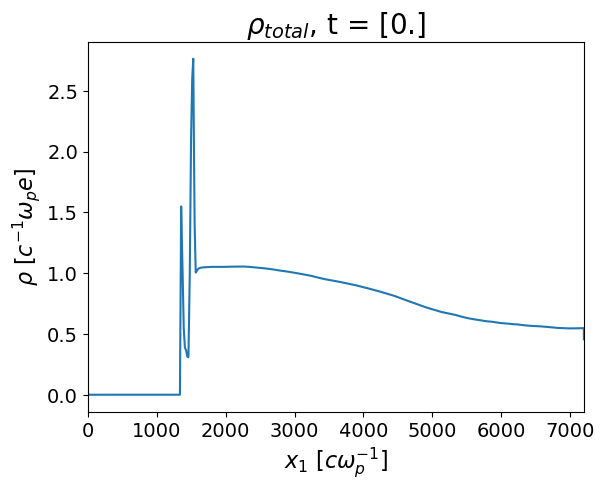

In [ ]:
frame= 0
c = osh5io.read_h5(f'{data_dir / diagnostics["DENSITY/background/charge"]}/charge-background-{frame:06d}.h5')
b = osh5io.read_h5(f'{data_dir / diagnostics["DENSITY/channel/charge"]}/charge-channel-{frame:06d}.h5')
# a = osh5io.read_h5(f'{data_dir / diagnostics["DENSITY/electron/charge"]}/charge-electron-{frame:06d}.h5')
# osh5vis.osplot(c,cmap = 'hot',title = r"$Zn_i$" + f", t = {round((c.run_attrs['TIME']/4781.497)[0],3)}" +  r"$\omega_{ci}^{-1}$",vmax = 9)
osh5vis.osplot(c+b, title = r"$\rho_{total}$, t = " + f"{(c.run_attrs['TIME'])}")

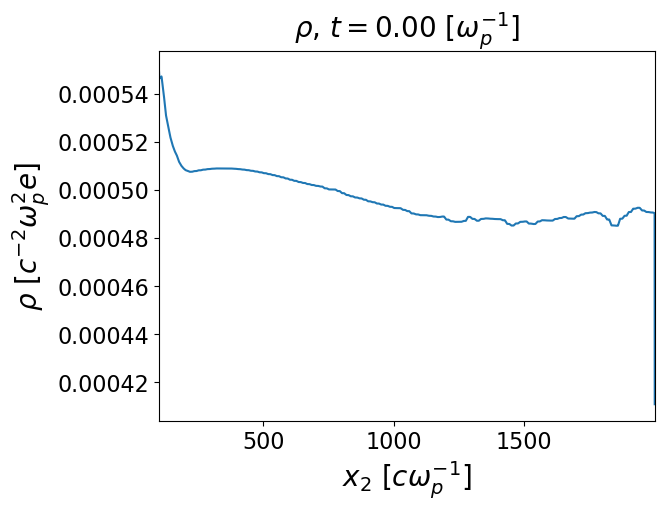

In [ ]:
c = osh5io.read_h5(f'{data_dir / diagnostics["DENSITY/Magnesium/charge"]}/charge-Magnesium-{0:06d}.h5')
plot = osh5vis.osplot(c[:,100])


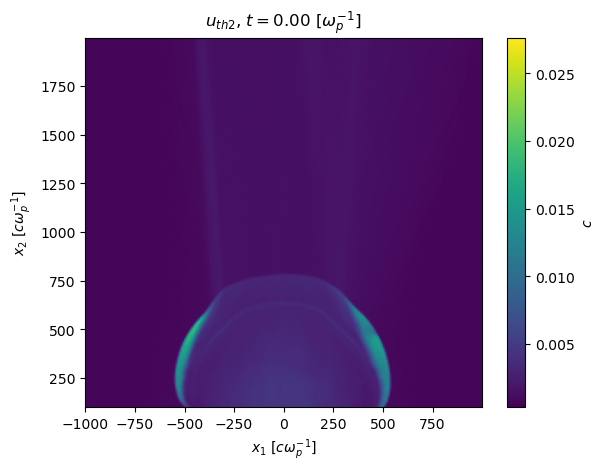

In [ ]:
c = osh5io.read_h5(f'{data_dir}/UDIST/Aluminum/uth2/uth2-Aluminum-000000.h5')
plot = osh5vis.osplot(c)

In [ ]:
stack = []  # Initialize an empty list to store slices
aluminum_path = Path(fields['DENSITY/Silicon']).parent

for file in sorted(aluminum_path.glob('*.h5')):
    slice = osh5io.read_h5(file.as_posix())  # Read the current file
    print(np.shape(slice))
    stack.append(slice)  # Append the slice to the list
    print(np.shape(stack))  # Combine all slices into a single array
stack = osh5def.

(100000,)
(1, 100000)
(100000,)
(2, 100000)
(100000,)
(3, 100000)
(100000,)
(4, 100000)
(100000,)
(5, 100000)
(100000,)
(6, 100000)
(100000,)
(7, 100000)
(100000,)
(8, 100000)
(100000,)
(9, 100000)
(100000,)
(10, 100000)
(100000,)
(11, 100000)
(100000,)
(12, 100000)
(100000,)
(13, 100000)
(100000,)
(14, 100000)
(100000,)
(15, 100000)
(100000,)
(16, 100000)
(100000,)
(17, 100000)
(100000,)
(18, 100000)
(100000,)
(19, 100000)
(100000,)
(20, 100000)
(100000,)
(21, 100000)
(100000,)
(22, 100000)
(100000,)
(23, 100000)
(100000,)
(24, 100000)


In [ ]:
osh5vis.osplot(stack)

AttributeError: 'numpy.ndarray' object has no attribute 'axes'